# Student Health Survey Anaylsis

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

In [2]:
# Importing the Economics Survey data
health_df = pd.read_csv('./data/2016FA_Health_Survey.csv')
health_df.head()

,id,Feet,Inches,Weight,Exercise per Week,Exercise Time,Read Label,Taste,Price,Nutrition,Presentation,Appearance,Health,Parents Overweight
0,916607086,6.0,0.0,220.0,5 to 7 days a week,Over an hour,Always,3.0,1.0,2.0,4.0,Yes,Yes,No
1,916077115,5.0,7.0,137.0,2 to 4 days a week,Over an hour,Often,4.0,1.0,2.0,3.0,Yes,Yes,No
2,916082731,5.0,10.0,150.0,2 to 4 days a week,30 - 40 minutes,Often,1.0,3.0,2.0,4.0,Yes,Yes,No
3,917218853,6.0,2.0,210.0,2 to 4 days a week,40 - 50 minutes,Often,1.0,3.0,2.0,4.0,Yes,Yes,No
4,916209091,5.0,9.0,163.0,2 to 4 days a week,Over an hour,Always,2.0,1.0,3.0,4.0,Yes,Yes,No


In [3]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 14 columns):
id                    222 non-null object
Feet                  220 non-null float64
Inches                220 non-null float64
Weight                221 non-null float64
Exercise per Week     222 non-null object
Exercise Time         221 non-null object
Read Label            222 non-null object
Taste                 209 non-null float64
Price                 210 non-null float64
Nutrition             209 non-null float64
Presentation          221 non-null float64
Appearance            222 non-null object
Health                222 non-null object
Parents Overweight    222 non-null object
dtypes: float64(7), object(7)
memory usage: 24.4+ KB


In [6]:
health_df.describe(include='all')

,id,Feet,Inches,Weight,Exercise per Week,Exercise Time,Read Label,Taste,Price,Nutrition,Presentation,Appearance,Health,Parents Overweight
count,222,220.00000,220.000000,221.000000,222,221,222,209.000000,210.000000,209.000000,221.000000,222,222,222
unique,222,NaN,NaN,NaN,4,5,5,NaN,NaN,NaN,NaN,2,2,3
top,916996358,NaN,NaN,NaN,2 to 4 days a week,Over an hour,Sometime,NaN,NaN,NaN,NaN,Yes,Yes,No
freq,1,NaN,NaN,NaN,93,88,77,NaN,NaN,NaN,NaN,205,212,165
mean,NaN,5.15000,5.359091,144.714932,NaN,NaN,NaN,2.028708,2.152381,2.631579,3.076923,NaN,NaN,NaN
std,NaN,0.54918,3.325995,35.645415,NaN,NaN,NaN,1.064794,1.047037,0.962348,1.065347,NaN,NaN,NaN
min,NaN,4.00000,0.000000,30.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,NaN,5.00000,3.000000,121.000000,NaN,NaN,NaN,1.000000,1.000000,2.000000,2.000000,NaN,NaN,NaN
50%,NaN,5.00000,5.000000,140.000000,NaN,NaN,NaN,2.000000,2.000000,3.000000,3.000000,NaN,NaN,NaN
75%,NaN,5.00000,8.000000,160.000000,NaN,NaN,NaN,3.000000,3.000000,3.000000,4.000000,NaN,NaN,NaN


In [7]:
health_cat = health_df[['Exercise per Week', 'Exercise Time', 'Read Label', 'Appearance', 'Health', 'Parents Overweight']]

In [8]:
# Report the repsonses in each column
for i in health_cat.columns[0:6]:
    print(f'Total Counts Table: {i}')
    table = health_cat[i].value_counts()
    print(table) 
    print('')
    print(f'Proportion Table: {i}')
    prop = health_cat[i].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(prop)
    print('-----------------------------------------')

Total Counts Table: Exercise per Week
2 to 4 days a week            93
I don't regularly exercise    59
Once a week                   51
5 to 7 days a week            19
Name: Exercise per Week, dtype: int64

Proportion Table: Exercise per Week
2 to 4 days a week            41.89%
I don't regularly exercise    26.58%
Once a week                   22.97%
5 to 7 days a week             8.56%
Name: Exercise per Week, dtype: object
-----------------------------------------
Total Counts Table: Exercise Time
Over an hour       88
40 - 50 minutes    41
30 - 40 minutes    36
20 - 30 minutes    35
10 - 20 minutes    21
Name: Exercise Time, dtype: int64

Proportion Table: Exercise Time
Over an hour       39.82%
40 - 50 minutes    18.55%
30 - 40 minutes    16.29%
20 - 30 minutes    15.84%
10 - 20 minutes      9.5%
Name: Exercise Time, dtype: object
-----------------------------------------
Total Counts Table: Read Label
Sometime         77
Not too often    52
Often            44
Never            

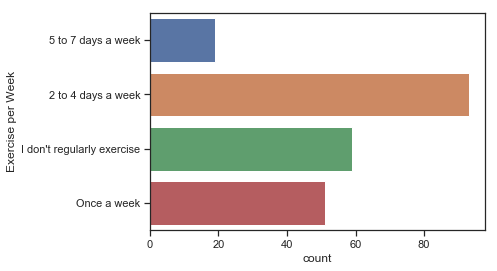

In [9]:
# Plot the students' responses with horizontal bar plot
ax = sns.countplot(y=health_df['Exercise per Week'])

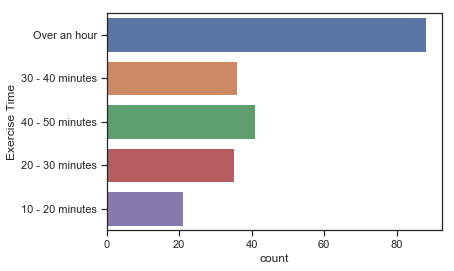

In [10]:
ax = sns.countplot(y=health_df['Exercise Time'])

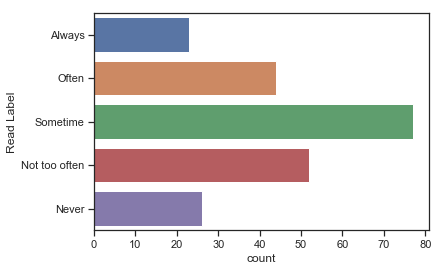

In [12]:
ax = sns.countplot(y=health_df['Read Label'])

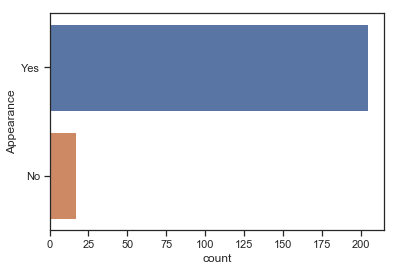

In [13]:
ax = sns.countplot(y=health_df['Appearance'])

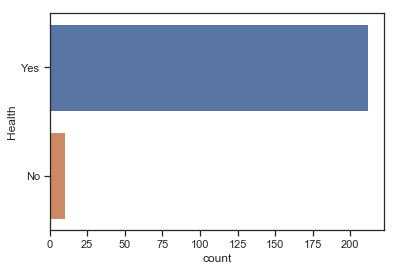

In [14]:
ax = sns.countplot(y=health_df['Health'])

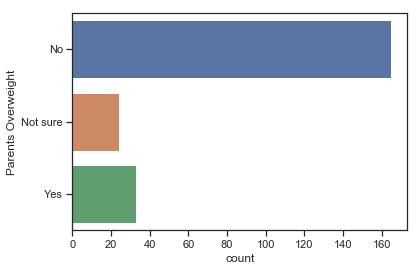

In [15]:
ax = sns.countplot(y=health_df['Parents Overweight'])

<function matplotlib.pyplot.show(*args, **kw)>

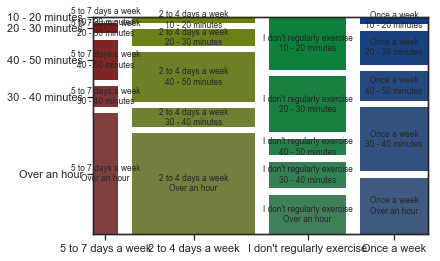

In [11]:
# plot from a contingency graph for exercise
mosaic(health_df, ['Exercise per Week', 'Exercise Time'], gap=0.05);
plt.show

In [19]:
health_df['height'] = health_df['Feet']*12 + health_df['Inches']
health_df['height'].describe()

count    220.000000
mean      67.159091
std        6.371108
min       53.000000
25%       64.000000
50%       67.000000
75%       70.000000
max      137.000000
Name: height, dtype: float64

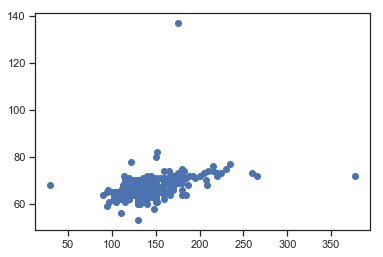

In [21]:
plt.scatter(health_df['Weight'], health_df['height'])